# Classifying digits 0-9 using neural networks

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import torch.nn.functional as F
import torchvision.transforms as transforms
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Abstract

This project aims to build a multi-class classifier using neural network model for classifying the images of handwritten digits from the MNIST data. Then an adversarial attack using the Fast Gradient Sign Method was implemented in order to break the neural network model built in the project. (More on this later)

# 1.   Theory and Introduction

The deep neural networks are a class a surperivsed machine learning models that are nonlinear for both input arguments and weights. The inspiration of neural network models is the structure of neural neworks in the brain. Models of the brain includes a large amounts of neurons that are communicates with each other through a complex network. This enables the brain to perform extremely complex computations, and the artifitial neural networks are modeled according to this computation paradigm. [1] [2]

# 1.1 Using Neural Network for classification

The deep neural networks are a class a surperivsed machine learning models that are nonlinear for both input arguments and weights. The inspiration of neural network models is the structure of neural neworks in the brain. Models of the brain includes a large amounts of neurons that are communicates with each other through a complex network. This enables the brain to perform extremely complex computations, and the artifitial neural networks are modeled according to this computation paradigm. [1] [2]

# 1.1.1  Feed Forward Neural Networks

Mathematically, A deep neural netwok model is a function consists of many layers of parametrised functions. A neural network $f_w(x)$ consisting of $L$ layers can be described by equation (1) :

\begin{equation}
f_w(x) := \phi_L(\phi_{L-1}(\dotsb \phi_2(\phi_1(x,w_1),w_2)\dotsb, w_{L-1}),w_L),    \quad\quad\quad \quad   (1)
\end{equation}

where $\{\phi_l\}_{l=1}^{L}$ is a collection of L activation functions which are parametrised with weights $w := \{w_l\}_{l=1}^{L}$, and $x$ is the input arguments.

In the project, we first of all chose our neural network archetecture to be a two-layer model described by equation (2):

\begin{equation}
f_w(x) := \phi_2( W_{2}^{T}( \phi_1( W_{1}^{T} X + b_1)) + b_2),   \quad\quad\quad\quad   (2)
\end{equation}

where $X$ is the input matrix, $\phi_1$ is the inner layer activation function with weight matrix $W_{1}$ and bias vector $b_1$ as the parameters of the activation function. Similarly, $\phi_2$ is the outer layer activation function with weight matrix $W_{2}$ and bias vector $b_2$ as parameters. Equation (2) describes a feedforward neural network,where the network structure does not contain any cycles. Figure 1 shows a directed acyclic graph represetating the feedforward neural network used in the project.

<img src="FeedForward_Graph.png",width=400, height=500 > ![image.png](attachment:image.png)

<center>Figure 1: A directed acyclic graph illustrating the structure of the feedforward neural network model used in this project</center>


The (bottom) input layer consists of $n$ nodes ($n$ represents the number of input features, in this project, $n = 784$ for $28 \times 28$ features of each input image). As shown in equation (2), starting from the input data matrix $X$, with the specified values of initial weight $W_{1}$ and bias $b_1$ of the input layer (which were chosen arbitrarily), an affine linear transformation on the input data matrix is applied. Then the resulting vector is fed into the first activation function, $\phi_1$, in order to obtain the hidden layer. The number of nodes, $h$, in the hidden layer can be arbitrarily defined, usually chosen to be between the number of input nodes and output nodes. (In this project, $h$ is chosen to be $200$.) As equation (2) describes, the results of the hidden layer are again applied with another affine linear transformation with the hidden layer weights and bias, $W_2$ and $b_2$. Then the results are wrapped in the second activation function $\phi_2$ in order to obtain the output layer. The number of nodes in the output layer reflects the number of classes in the classification. In this project, there are 10 classes (or class labels) representing the handwritten digits from 0 to 9.

# 1.1.2  The activation functions

In this project, the first activation function $\phi_1$ is chosen to be the ReLU (Rectified Linear Unit) function described by equation (3):

\begin{equation}
\phi_1(z) := max(0,z) \quad \quad \quad \quad   (3)
\end{equation}

As equation (3) suggests, the ReLU function takes an input value $z$, and returns either the value itself if $z$ is positive, or $0$ if z is negative. In this project, $z$ represents elements of the vector produced by the first affine linear transformation: $W_{1}^{T} X + b_1$. Figure 2 illustrates the ReLU function.

<img src="ReLU.png",width=300, height=400 > ![image.png](attachment:image.png)


<center>Figure 2: A plot of the Rectified Linear Unit (ReLU). [3] function</center>

The ReLU function is chosen for the first activation function because it is cheap to compute, it helps the algorithm converge faster (due to its linearity, compared to functions like sigmoid or tanh, it does not suffer from the problem of vanishing gradient), and it is sparsily activatd. [3]

The second activation function $\phi_2$ is chosen to be the softmax function, described by equation (4). The softmax function takes a vector as an input and returns a vector output of the same size. For the $ith$ element of the input vector $z_i$, it returns the $ith$ element of the output vector $\phi_{2i}$ as:

\begin{equation}
\phi_{2i}(z_i) = \frac{e^{z_i}}{\sum_{k=1}^{K} e^{z_k}} \quad for \quad i = 1,...,K, \quad \quad \quad \quad (4)
\end{equation}

where $z_k$ represents the the $kth$ element of the vector input, and there are in total $K$ elements in both the input and output vectors. The softmax function is chosen to be the final layer because it converts the arguments into values between $0$ and $1$, hence computes the probability of each class label. Then we can choose the class label with the largest probability as the predicted class label.

# 1.1.3  Back Propagation and Training the neural network

With the neural network model specified, the neural network needs to be trained in order to obtain the values of the parameters that minimises the empirical risk (the cost function) via optimization algorithms. However, due to the neural network model not being differentiable, the gradient of the cost function (with respect to the model parameters) are computed via backpropagation.

The cost function is chosen to be the cross entropy function described by equation (5):

\begin{equation}
L(W_1, ... , W_L, b_1, ... , b_L) = - \sum_i y_i log( \hat{y_i}), \quad \quad \quad (5)
\end{equation}

where $y_i$ represents the $ith$ element of the output vector (the vector of output class labels), and $\hat{y_i}$ represents the $ith$ element of the predicted output from the neural netowkr model.

In the project, instead of manually computing the backpropagation, Pytorch is used to automatically compute the backpropagation and obtain gradients of the cost function.

The two optimization methods tried in this project are stochasiric gradient descent and Adam optimization algorithm. Adam optimization algorithm is also a stochastic optimization method,  but computes individual adaptive learning rates for different model parameters by estimating first and second moments of gradients.[4]

# 1.2 Adversarial Attack: Fast Gradient Sign Method

Adversarial attack aims to add the smallest amount of perturbation to the input data in order to cause specific types of misclassifications. The white-box attack, which is the kind of attack implemented in this project, requires full access to the neural network architecture with input and output data, as well as values of the optimized weights. (The black-box attack in comparison assumes no knowledge of the model apart from the input output data) [5]

The fast gradient sign method (FGSM) is a popular and powerful attack engineered to attack the model by adding perturbations in the direction of the gradient, i.e. the way the neural network learn, in order to achieve misclassifications. This is outlined by equation (6):

\begin{equation}
 x_i' = x_i + \epsilon sign(\nabla_{x} l_i (f_w(x_i), y_i), \quad \quad \quad \quad(6)
\end{equation}

where $x_i$ represents the $ith$ element of the original input data, $y_i$ represents the true output labels, and $\epsilon$ specifies the magnitude of the adversarial perturbation.

In the case of the project, the attack alters the input image by adding noises to cause misclassifications of the handwritten digits shown by the original image.

# 2.   Method

## Load Data

To load the data we use the torchvision library to access the dataset and shuffle if required where our data is a batch size of 100. We can then show the first 25 images of the dataset where 10000 are test images.

In [ ]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

trans=transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,),(0.5,))])

mnist_train = datasets.MNIST("../data", train=True, download=True, transform=trans)
mnist_test = datasets.MNIST("../data", train=False, download=True, transform=trans)
train_loader = DataLoader(mnist_train, batch_size = 100, shuffle=True)
test_loader = DataLoader(mnist_test, batch_size = 100, shuffle=False)


Extracting ../data/MNIST/raw/train-images-idx3-ubyte.gz to ../data/MNIST/raw



Extracting ../data/MNIST/raw/train-labels-idx1-ubyte.gz to ../data/MNIST/raw



Extracting ../data/MNIST/raw/t10k-images-idx3-ubyte.gz to ../data/MNIST/raw



Extracting ../data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/MNIST/raw
Processing...
Done!


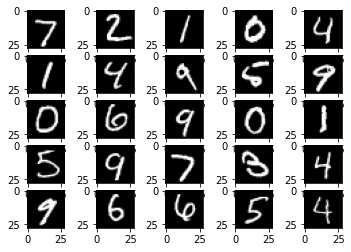

In [ ]:
examples = iter(test_loader)
example_data, example_targets = examples.next()

for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(example_data[i][0], cmap='gray')
plt.show()

# Multiclass problem

# Fully connected neural network with one hidden layer and Relu activation function

In [ ]:
class Flatten(nn.Module):
    def forward(self, x):
        return x.view(x.shape[0], -1)

class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.linear1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.linear2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out = torch.flatten(x, 1)
        out = self.linear1(out)
        out = self.relu(out)
        out = self.linear2(out)
        # no softmax at the end
        return out

In [ ]:
model = NeuralNet(input_size=28*28, hidden_size=200, num_classes=10)
criterion = nn.CrossEntropyLoss()  # (applies Softmax)

In [ ]:
model

NeuralNet(
  (linear1): Linear(in_features=784, out_features=200, bias=True)
  (relu): ReLU()
  (linear2): Linear(in_features=200, out_features=10, bias=True)
)

input_size = 784 (28x28) \
hidden_size = 200 \
num_classes = 10 \
num_epochs = 15 \
batch_size = 100 \
learning_rate = 0.01

Adam optimisation, an extension to stochastic gradient descent is used as an optimiser. It computes individual adaptive learning rates for different parameters from estimates of first and second moments of the gradients. \
\
opt.zero_grad( ): resets the .grad values of model parameters, weights and bias, back to zero. \
loss.backward( ): computes the gradient of loss with respect to the model parameters, weights and bias, which we are optimising. \
opt.step( ): performs the model parameter update, and updates the weights and biases, according to the optimiser used. \
Loss is updated with new parameters, after optimisation.

In [ ]:
opt =  optim.Adam(model.parameters(), lr=0.01, weight_decay= 1e-6)
num_epochs = 15
n_total_steps = len(train_loader)
Loss_list = []
for epoch in range(num_epochs):
    for i, (X, y) in enumerate(train_loader):
        # origin shape: [100, 1, 28, 28]
        # resized: [100, 784]
        X = X.reshape(-1, 28*28).to(device)
        y = y.to(device)

        # Forward pass
        yp = model(X)
        loss = nn.CrossEntropyLoss()(yp,y)

        # Backward and optimize
        opt.zero_grad()
        loss.backward()
        opt.step()

        if (i+1) % 100 == 0:
            Loss_list.append(loss.item())
            print (f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')

Epoch [1/15], Step [100/600], Loss: 0.3889
Epoch [1/15], Step [200/600], Loss: 0.1363
Epoch [1/15], Step [300/600], Loss: 0.4765
Epoch [1/15], Step [400/600], Loss: 0.3860
Epoch [1/15], Step [500/600], Loss: 0.1143
Epoch [1/15], Step [600/600], Loss: 0.2891
Epoch [2/15], Step [100/600], Loss: 0.2245
Epoch [2/15], Step [200/600], Loss: 0.1476
Epoch [2/15], Step [300/600], Loss: 0.0526
Epoch [2/15], Step [400/600], Loss: 0.1270
Epoch [2/15], Step [500/600], Loss: 0.3655
Epoch [2/15], Step [600/600], Loss: 0.1795
Epoch [3/15], Step [100/600], Loss: 0.2122
Epoch [3/15], Step [200/600], Loss: 0.1762
Epoch [3/15], Step [300/600], Loss: 0.3320
Epoch [3/15], Step [400/600], Loss: 0.2323
Epoch [3/15], Step [500/600], Loss: 0.0508
Epoch [3/15], Step [600/600], Loss: 0.1355
Epoch [4/15], Step [100/600], Loss: 0.1645
Epoch [4/15], Step [200/600], Loss: 0.1360
Epoch [4/15], Step [300/600], Loss: 0.2007
Epoch [4/15], Step [400/600], Loss: 0.2886
Epoch [4/15], Step [500/600], Loss: 0.3020
Epoch [4/15

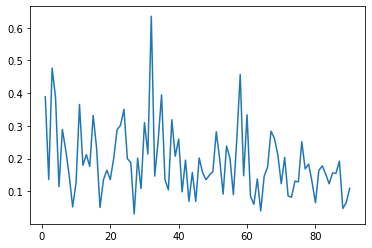

In [ ]:
#Plotting the evolution of the loss function
Step_list = np.linspace(1,90,90)
plt.plot(Step_list,Loss_list)
plt.show()
# np.shape(Loss_list)

Finding the accuracy of the model by calucating the percentage of correct predictions.

In [ ]:
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for X, y in test_loader:
        X = X.reshape(-1, 28*28).to(device)
        y = y.to(device)
        yp = model(X)
        # max returns (value ,index)
        _, predicted = torch.max(yp.data, 1)
        n_samples += y.size(0)
        n_correct += (predicted == y).sum().item()

    acc = 100.0 * n_correct / n_samples
    print(f'Accuracy of the network on the 10000 test images: {acc} %')

Accuracy of the network on the 10000 test images: 95.53 %


Stochastic gradient descent optimisation

In [ ]:
model2 = NeuralNet(input_size=28*28, hidden_size=200, num_classes=10)
criterion = nn.CrossEntropyLoss()  # (applies Softmax)

In [ ]:
opt_SGD =  optim.SGD(model2.parameters(), lr=0.01, weight_decay= 1e-6)
num_epochs = 15
n_total_steps = len(train_loader)
Loss_list2 = []
for epoch in range(num_epochs):
    for i, (X, y) in enumerate(train_loader):
        # origin shape: [100, 1, 28, 28]
        # resized: [100, 784]
        X = X.reshape(-1, 28*28).to(device)
        y = y.to(device)

        # Forward pass
        yp2 = model2(X)
        loss2 = nn.CrossEntropyLoss()(yp2,y)

        # Backward and optimize
        opt_SGD.zero_grad()
        loss2.backward()
        opt_SGD.step()

        if (i+1) % 100 == 0:
            Loss_list2.append(loss2.item())
            print (f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss2.item():.4f}')

Epoch [1/15], Step [100/600], Loss: 1.4924
Epoch [1/15], Step [200/600], Loss: 0.9912
Epoch [1/15], Step [300/600], Loss: 0.7569
Epoch [1/15], Step [400/600], Loss: 0.5875
Epoch [1/15], Step [500/600], Loss: 0.5424
Epoch [1/15], Step [600/600], Loss: 0.3916
Epoch [2/15], Step [100/600], Loss: 0.4110
Epoch [2/15], Step [200/600], Loss: 0.4509
Epoch [2/15], Step [300/600], Loss: 0.3759
Epoch [2/15], Step [400/600], Loss: 0.4866
Epoch [2/15], Step [500/600], Loss: 0.3724
Epoch [2/15], Step [600/600], Loss: 0.3387
Epoch [3/15], Step [100/600], Loss: 0.3473
Epoch [3/15], Step [200/600], Loss: 0.3716
Epoch [3/15], Step [300/600], Loss: 0.4891
Epoch [3/15], Step [400/600], Loss: 0.4703
Epoch [3/15], Step [500/600], Loss: 0.2688
Epoch [3/15], Step [600/600], Loss: 0.3449
Epoch [4/15], Step [100/600], Loss: 0.3116
Epoch [4/15], Step [200/600], Loss: 0.3845
Epoch [4/15], Step [300/600], Loss: 0.3373
Epoch [4/15], Step [400/600], Loss: 0.3363
Epoch [4/15], Step [500/600], Loss: 0.1862
Epoch [4/15

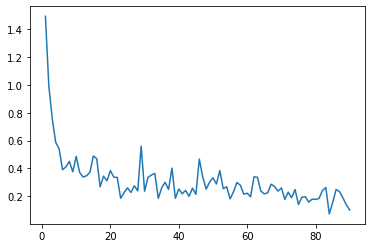

In [ ]:
#Plotting the evolution of the loss function
Step_list = np.linspace(1,90,90)
plt.plot(Step_list,Loss_list2)
plt.show()
# np.shape(Loss_list2)

Finding the accuracy of the model by calucating the percentage of correct predictions.

In [ ]:
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for X, y in test_loader:
        X = X.reshape(-1, 28*28).to(device)
        y = y.to(device)
        yp2 = model2(X)
        # max returns (value ,index)
        _, predicted = torch.max(yp2.data, 1)
        n_samples += y.size(0)
        n_correct += (predicted == y).sum().item()

    acc = 100.0 * n_correct / n_samples
    print(f'Accuracy of the network on the 10000 test images: {acc} %')

Accuracy of the network on the 10000 test images: 94.65 %


In [ ]:
torch.save(model.state_dict(), "model.pt")

In [ ]:
model.load_state_dict(torch.load("model.pt"))

<All keys matched successfully>

## Convolutional neural network

Input image has size 28 \* 28 and has 1 input channel as it is the grey-scale image

Stride: The number of pixels we shift our kernel along by to compute the next value in the output activation map.It is the step size of the filter \
Padding: Pad the input with a border of extra pixels around the edge. \
Max pooling: Replaces the values at each grid location with their maximum.

1 input image channel, 6 output channels, 5x5 square convolution kernel \
Input channel size must be equal to the last output channel size (The output channel size can be anything). \
max polling with a kernel size 2 by 2 and a stride of 2.
6 input image channel, 16 output channels, 5x5 square convolution kernel \
In x.view(-1,16\*5\*5), the first dimention is the batch size. \
If the input size = i \* i (with same height and width), filter size = f \* f, padding=p, and stride=s, then the output dimension = o \* o, \
where o= $\frac{(i-f +2p)}{s} + 1$

image size= (batch size, 1, 28, 28) \
(28-5+0)/1 +1=24 \
after conv1, image size= (batch size, 6, 24, 24) \
(24-2+0)/2 +1=12 \
after pool, image size= (batch size, 6, 12, 12) \
(12-5+0)/1 +1=8 \
after conv2, image size= (batch size, 16, 8, 8) \
(8-2+0)/2 +1=4 \
after pool, image size= (batch size, 16, 4, 4)

After the convolutional layers, the next step is to flatten the 3-D tensors into 1-D tensor, for the classification layer. \
The input size for the linear layer is 16\*4\*4 \
Applying relu activation function at every layer

In [ ]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 4 * 4, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 4 * 4)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


model_cnn = Net()

In [ ]:
model_cnn

Net(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=256, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [ ]:
c = nn.CrossEntropyLoss()
o = optim.SGD(model_cnn.parameters(), lr=0.001, momentum=0.9)

In [ ]:
def train(model_cnn):

    for epoch in range(5): # no. of epochs
        running_loss = 0.0
        for i, data in enumerate(train_loader, 0):
            # data pixels and labels to GPU if available
            inputs, labels = data[0].to(device, non_blocking=True), data[1].to(device, non_blocking=True)
            # set the parameter gradients to zero
            o.zero_grad()
            outputs = model_cnn(inputs)
            loss = c(outputs, labels)
            # propagate the loss backward
            loss.backward()
            o.step()

            # print for mini batches
            running_loss += loss.item()
            if i % 500 == 499:  # every 500 mini batches
                print('[Epoch %d, %5d Mini Batches] loss: %.3f' %
                      (epoch + 1, i + 1, running_loss/500))
                running_loss = 0.0

In [ ]:
train(model_cnn)

[Epoch 1,   500 Mini Batches] loss: 2.286
[Epoch 2,   500 Mini Batches] loss: 1.069
[Epoch 3,   500 Mini Batches] loss: 0.338
[Epoch 4,   500 Mini Batches] loss: 0.232
[Epoch 5,   500 Mini Batches] loss: 0.175


In [ ]:
with torch.no_grad():
    correct = 0
    total = 0
    for data in test_loader:
        inputs, labels = data[0].to(device, non_blocking=True), data[1].to(device, non_blocking=True)
        outputs = model_cnn(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    acc = 100.0 * correct / total
    print(f'Accuracy of the network on the 10000 test images: {acc} %')

Accuracy of the network on the 10000 test images: 95.49 %


In [ ]:
model_cnn2 = nn.Sequential(nn.Conv2d(1, 32, 3, padding=1), nn.ReLU(),
                          nn.Conv2d(32, 32, 3, padding=1, stride=2), nn.ReLU(),
                          nn.Conv2d(32, 64, 3, padding=1), nn.ReLU(),
                          nn.Conv2d(64, 64, 3, padding=1, stride=2), nn.ReLU(),
                          Flatten(),
                          nn.Linear(7*7*64, 100), nn.ReLU(),
                          nn.Linear(100, 10)).to(device)

In [ ]:
model_cnn2

Sequential(
  (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU()
  (2): Conv2d(32, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (3): ReLU()
  (4): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (5): ReLU()
  (6): Conv2d(64, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (7): ReLU()
  (8): Flatten()
  (9): Linear(in_features=3136, out_features=100, bias=True)
  (10): ReLU()
  (11): Linear(in_features=100, out_features=10, bias=True)
)

In [ ]:
criterion2 = nn.CrossEntropyLoss()
optimizer2 = optim.SGD(model_cnn2.parameters(), lr=0.001, momentum=0.9)

In [ ]:
def train(model_cnn2):

    for epoch in range(5): # no. of epochs
        running_loss = 0.0
        for i, data in enumerate(train_loader, 0):
            # data pixels and labels to GPU if available
            inputs, labels = data[0].to(device, non_blocking=True), data[1].to(device, non_blocking=True)
            # set the parameter gradients to zero
            optimizer2.zero_grad()
            outputs = model_cnn2(inputs)
            loss = criterion2(outputs, labels)
            # propagate the loss backward
            loss.backward()
            optimizer2.step()

            # print for mini batches
            running_loss += loss.item()
            if i % 500 == 499:  # every 500 mini batches
                print('[Epoch %d, %5d Mini Batches] loss: %.3f' %
                      (epoch + 1, i + 1, running_loss/500))
                running_loss = 0.0

In [ ]:
train(model_cnn2)

[Epoch 1,   500 Mini Batches] loss: 2.299
[Epoch 2,   500 Mini Batches] loss: 1.220
[Epoch 3,   500 Mini Batches] loss: 0.292
[Epoch 4,   500 Mini Batches] loss: 0.204
[Epoch 5,   500 Mini Batches] loss: 0.157


In [ ]:
with torch.no_grad():
    correct = 0
    total = 0
    for data in test_loader:
        inputs, labels = data[0].to(device, non_blocking=True), data[1].to(device, non_blocking=True)
        outputs = model_cnn2(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    acc = 100.0 * correct / total
    print(f'Accuracy of the network on the 10000 test images: {acc} %')

Accuracy of the network on the 10000 test images: 95.72 %


In [ ]:
torch.save(model_cnn.state_dict(), "model_cnn.pt")

In [ ]:
model_cnn.load_state_dict(torch.load("model_cnn.pt"))

<All keys matched successfully>

## Fast Gradient Sign Method (FGSM)


Adversarial attack aims to add the smallest amount of perturbation to the input data in order to cause specific types of misclassifications. The white-box attack, which is the kind of attack implemented in this project, requires full access to the neural network architecture with input and output data, as well as values of the optimized weights. (The black-box attack in comparison assumes no knowledge of the model apart from the input output data) [5]

The fast gradient sign method (FGSM) is a popular and powerful attack engineered to attack the model by adding perturbations in the direction of the gradient, i.e. the way the neural network learn, in order to achieve misclassifications. This is outlined by equation (6):

\begin{equation}
 x_i' = x_i + \epsilon sign(\nabla_{x} l_i (f_w(x_i), y_i), \quad \quad \quad \quad(6)
\end{equation}

where $x_i$ represents the $ith$ element of the original input data, $y_i$ represents the true output labels, and $\epsilon$ specifies the magnitude of the adversarial perturbation. x’ is the adversarial input (deliberately designed to misclassify by the model)

In the case of the project, the attack alters the input image by adding noises to cause misclassifications of .


In [ ]:
def fgsm(model, X, y, epsilon):
    """ Construct FGSM adversarial examples on the examples X"""
    delta = torch.zeros_like(X, requires_grad=True)
    loss = nn.CrossEntropyLoss()(model(X + delta), y)
    loss.backward()
    return epsilon * delta.grad.detach().sign()

In [ ]:
for X,y in test_loader:
    X,y = X.to(device), y.to(device)
    break

def plot_images(X,y,yp,M,N):
    f,ax = plt.subplots(M,N, sharex=True, sharey=True, figsize=(N,M*1.3))
    for i in range(M):
        for j in range(N):
            ax[i][j].imshow(1-X[i*N+j][0].cpu().numpy(), cmap="gray")
            title = ax[i][j].set_title("Pred: {}".format(yp[i*N+j].max(dim=0)[1]))
            plt.setp(title, color=('g' if yp[i*N+j].max(dim=0)[1] == y[i*N+j] else 'r'))
            ax[i][j].set_axis_off()
    plt.tight_layout()

In [ ]:
def epoch_adversarial(model, loader, attack, *args):
    total_loss, total_acc = 0.,0.
    for X,y in loader:
        X,y = X.to(device), y.to(device)
        delta = attack(model, X, y, *args)
        yp = model(X+delta)
        loss = nn.CrossEntropyLoss()(yp,y)

        total_acc += (yp.max(dim=1)[1] == y).sum().item()
        total_loss += loss.item() * X.shape[0]
    return total_acc / len(loader.dataset), total_loss / len(loader.dataset)

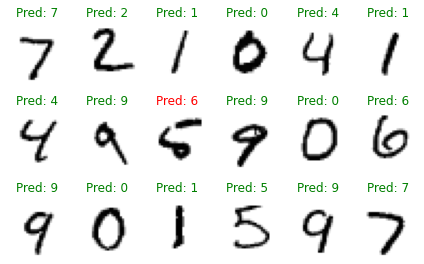

In [ ]:
yp = model(X)
plot_images(X, y, yp, 3, 6)

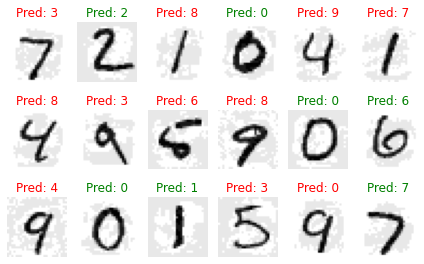

In [ ]:
delta = fgsm(model, X, y, 0.1)
yp = model(X + delta)
plot_images(X+delta, y, yp, 3, 6)

In [ ]:
print("2-layer DNN:", epoch_adversarial(model, test_loader, fgsm, 0.1)[0]*100)

2-layer DNN: 50.36000000000001


In [ ]:
epsilons = [0, .05, .1, .15, .2, .25, .3]
accuracies = []
for eps in epsilons:
    accuracy = epoch_adversarial(model, test_loader, fgsm, eps)[0]
    accuracies.append(accuracy)

[0.9553, 0.7727, 0.5036, 0.3596, 0.2723, 0.2217, 0.1934]


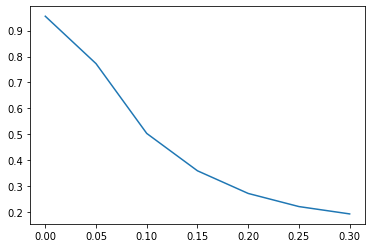

In [ ]:
print(accuracies)
plt.plot(epsilons,accuracies)
plt.show()

In [ ]:
print("CNN:", epoch_adversarial(model_cnn, test_loader, fgsm, 0.1)[0]*100)

CNN: 66.2


## FGSM Attack on CNN

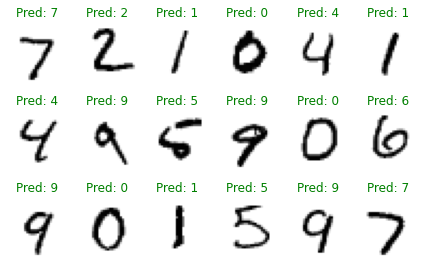

In [ ]:
yp = model_cnn(X)
plot_images(X, y, yp, 3, 6)

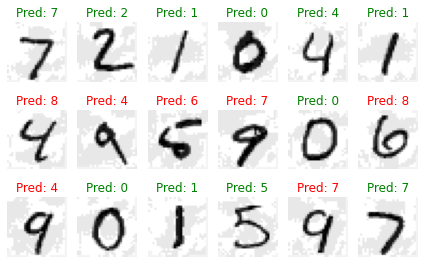

In [ ]:
delta = fgsm(model_cnn, X, y, 0.1)
yp = model_cnn(X + delta)
plot_images(X+delta, y, yp, 3, 6)

In [ ]:
print("CNN:", epoch_adversarial(model_cnn, test_loader, fgsm, 0.1)[0])

CNN: 0.662


In [ ]:
epsilons = [0, .05, .1, .15, .2, .25, .3]
accuracies = []
for eps in epsilons:
    accuracy = epoch_adversarial(model, test_loader, fgsm, eps)[0]
    accuracies.append(accuracy)

[0.9553, 0.7727, 0.5036, 0.3596, 0.2723, 0.2217, 0.1934]


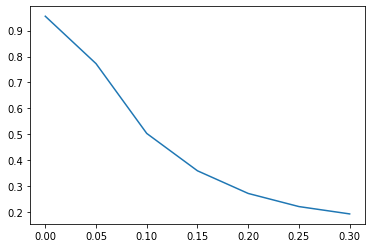

In [ ]:
print(accuracies)
plt.plot(epsilons,accuracies)
plt.show()

## Results

# References

[1] Benning, M. (2020). *Advanced Machine Learning, Deep Learning.* Queen Mary University of London

[2] Shalev-Shwartz, S. and Ben-David, S. (2014) “Neural Networks,” in *Understanding Machine Learning: From Theory to Algorithms.* Cambridge: Cambridge University Press, pp. 228–242. doi: 10.1017/CBO9781107298019.021.

[3] Liu, D., 2017. *A Practical Guide To Relu.* [online] Medium. Available at: <https://medium.com/@danqing/a-practical-guide-to-relu-b83ca804f1f7> [Accessed 15 March 2020].

[4] Kingma, Diederik & Ba, Jimmy. (2014). *Adam: A Method for Stochastic Optimization.* International Conference on Learning Representations.

[5] Inkawhich, N., 2017. *Adversarial Example Generation — Pytorch Tutorials 1.4.0 Documentation.* [online] Pytorch.org. Available at: <https://pytorch.org/tutorials/beginner/fgsm_tutorial.html> [Accessed 15 March 2020].

[6] D2l.ai. 2020. 6. Convolutional Neural Networks — Dive Into Deep Learning 0.7.1 Documentation. [online] Available at: <https://d2l.ai/chapter_convolutional-neural-networks/index.html> [Accessed 15 March 2020].

[7] https://github.com/python-engineer/pytorchTutorial